In [1]:
from Embed import *
import pandas as pd
import numpy as np
import random
import networkx as nx
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
import collections

from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


Bad key "text.kerning_factor" on line 4 in
C:\Users\tarik\Anaconda3\envs\graphs\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [6]:
fo = open('accuracy_test_results_baseline_mp.txt', 'w')
fo.write('set\ttp\ttn\tfp\tfn\tacc\n')
# read the A_train graph
for ix in range(1, 2):#range(1, 6)

    # ---------------- training ----------------------
    train_graph_name = '../../graphs/graph_sampled_' + str(ix) + '.gml.gz'
    G = nx.read_gml(train_graph_name)
    print (f" reading part {str(ix)} \n graph of     {len(G.nodes())} node        and {len(G.edges())}  edge")
    #train_edges_name = '../../graphs/graph_train_edges_sampled_' + str(ix) + '.csv'

    x_data = nodes_embedding(G,2,0.9)
    DD = []
    for i in x_data.values():
        dic = {}
        items = []
        for k,v in i.items():
            items.append(k)
            dic[len(items)-1] = float(v)
        #dic = sorted(dic)
        #dic = dict(collections.OrderedDict(sorted(dic.items())))
        #print(dic)
        DD.append(dic)
    print(len(DD[0]))
    embd = []
    for i in range(len(items)):
        embd.append([DD[0][i],DD[1][i]])#,DD[2][i]])#,DD[3][i],DD[4][i],DD[5][i],DD[6][i]])
    #df = pd.DataFrame(embd)
    #file = f"./ebd{ix}.csv"
    df = pd.DataFrame(items)
    file = f"./items.csv"
    df.to_csv(file)
    del G
    del x_data
    
    # --------------- validation ---------------------------
    #val_edges_name = '../../graphs/graph_val_edges_sampled_' + str(ix) + '.csv'

    # compute the performance over validation set
    #list_pred_scores_val, list_real_labels_val = collectAdarScores(G, val_edges_name)

    # train and fit the deep learning model np.array(list_pred_scores).reshape(-1, 1)
    #model = trainTheClassifier(np.array(list_pred_scores_train).reshape(-1, 1), list_real_labels_train, np.array(list_pred_scores_val).reshape(-1, 1), list_real_labels_val)
'''
    # --------------- test ------------------------------------
    #test_graph_name = 'graphs/graph_test_' + str(ix) + '.gml.gz'
    test_edges_name = '../../graphs/graph_test_edges_sampled_' + str(ix) + '.csv'

    if 'adar' in method_:
        list_pred_scores_test, list_real_labels_test = collectAdarScores(G, test_edges_name)
    else:
        list_pred_scores_test, list_real_labels_test = collectJaccardScores(G, test_edges_name)
    list_pred_labels_test = classifyFeatures(np.array(list_pred_scores_test).reshape(-1, 1), model)

    fo__ = open('prediction_results_test_mp_' + str(ix) + '.txt', 'w')
    for icurrpred in range(len(list_pred_labels_test)):
        fo__.write(str(list_pred_labels_test[icurrpred, 1]) + '\t' + str(list_real_labels_test[icurrpred]) + '\n')
    fo__.close()
    # compute the performance over test set
    tp_t, tn_t, fp_t, fn_t = computeAccuracy(list_pred_labels_test[:, 1], list_real_labels_test)
    acc_t = (tp_t+tn_t)/float(tp_t+tn_t+fp_t+fn_t)
    fo.write('test\t' + str(tp_t) + '\t' + str(tn_t) + '\t' + str(fp_t) + '\t' + str(fn_t) + '\t' + str(acc_t) + '\n')
    del G

fo.close()
'''

 reading part 1 
 graph of     180366 node        and 385592  edge
matrix shape :  180366 X 180366
   matrix is normalized         
   matrix of transaction built       


  0%|                                                                                       | 0/385592 [00:00<?, ?it/s]

 385592   edges in current level ' 2 '


100%|█████████████████████████████████████████████████████████████████████████| 385592/385592 [11:31<00:00, 557.53it/s]


level 2 built  in 692.2100548744202
   begin embedding         
Embeding done in  762.9900488853455
180366


"\n    # --------------- test ------------------------------------\n    #test_graph_name = 'graphs/graph_test_' + str(ix) + '.gml.gz'\n    test_edges_name = '../../graphs/graph_test_edges_sampled_' + str(ix) + '.csv'\n\n    if 'adar' in method_:\n        list_pred_scores_test, list_real_labels_test = collectAdarScores(G, test_edges_name)\n    else:\n        list_pred_scores_test, list_real_labels_test = collectJaccardScores(G, test_edges_name)\n    list_pred_labels_test = classifyFeatures(np.array(list_pred_scores_test).reshape(-1, 1), model)\n\n    fo__ = open('prediction_results_test_mp_' + str(ix) + '.txt', 'w')\n    for icurrpred in range(len(list_pred_labels_test)):\n        fo__.write(str(list_pred_labels_test[icurrpred, 1]) + '\t' + str(list_real_labels_test[icurrpred]) + '\n')\n    fo__.close()\n    # compute the performance over test set\n    tp_t, tn_t, fp_t, fn_t = computeAccuracy(list_pred_labels_test[:, 1], list_real_labels_test)\n    acc_t = (tp_t+tn_t)/float(tp_t+tn_t+fp

In [16]:
DD = []
for i in x_data.values():
    dic = {}
    items = []
    for k,v in i.items():
        items.append(k)
        dic[len(items)-1] = float(v)
    #dic = sorted(dic)
    #dic = dict(collections.OrderedDict(sorted(dic.items())))
    #print(dic)
    DD.append(dic)
print(len(DD[0]))
embd = []
for i in range(len(items)):
    embd.append([DD[0][i],DD[1][i]])#,DD[2][i]])#,DD[3][i],DD[4][i],DD[5][i],DD[6][i]])
df = pd.DataFrame(embd)
file = f"./embed{ix}.csv"
df.to_csv(file)

NameError: name 'x_data' is not defined

In [16]:
print(list(x_data[1].keys())[:6])

['take', 'taskforce', 'america', 'game', 'speak', 'exceptional adulthood']


In [3]:
df1 = pd.read_csv('embed1.csv') 
df1.head()

,Unnamed: 0,0,1
0,0,0.003640,0.002961
1,1,0.000045,0.000039
2,2,0.000116,0.000094
3,3,0.000689,0.000550
4,4,0.000313,0.000245


In [4]:
items = []
for ix in range(1, 6):#range(1, 6)

    # ---------------- training ----------------------
    train_graph_name = '../../graphs/graph_sampled_' + str(ix) + '.gml.gz'
    G = nx.read_gml(train_graph_name)
    print (f" reading part {str(ix)} \n graph of     {len(G.nodes())} node        and {len(G.edges())}  edge")
    #train_edges_name = '../../graphs/graph_train_edges_sampled_' + str(ix) + '.csv'

    x_data = nodes_embedding(G,1,0.9)
    DD = []
    for i in x_data.values():
        dic = {}
        item = []
        for k,v in i.items():
            item.append(k)
            dic[len(item)-1] = float(v)
        #dic = sorted(dic)
        #dic = dict(collections.OrderedDict(sorted(dic.items())))
        #print(dic)
        DD.append(dic)
    print(len(DD[0]))
    embd = []
    for i in range(len(item)):
        embd.append([DD[0][i]])#,DD[1][i]])#,DD[2][i]])#,DD[3][i],DD[4][i],DD[5][i],DD[6][i]])
    df = pd.DataFrame(embd)
    file = f"./emb{ix}.csv"
    #df.to_csv(file)
    items.append(item)
    del G
    del x_data

 reading part 1 
 graph of     180366 node        and 385592  edge
matrix shape :  180366 X 180366
   matrix is normalized         
   matrix of transaction built       
   begin embedding         
Embeding done in  14.083883285522461
180366
 reading part 2 
 graph of     180366 node        and 385592  edge
matrix shape :  180366 X 180366
   matrix is normalized         
   matrix of transaction built       
   begin embedding         
Embeding done in  17.68531370162964
180366


KeyboardInterrupt: 

In [7]:
train_graph_name = '../../graphs/graph_sampled_1.gml.gz'
G = nx.read_gml(train_graph_name)

In [3]:
node_list_1 = []
node_list_2 = []

for i in tqdm(G.edges()):
    #print(i)
    node_list_1.append(i[0])
    node_list_2.append(i[1])

G_df = pd.DataFrame({'node_1': node_list_1, 'node_2': node_list_2})

G_df.head()


100%|██████████████████████████████████████████████████████████████████████| 385592/385592 [00:00<00:00, 807088.56it/s]


,node_1,node_2
0,take,poverty
1,take,laboratory station
2,take,drug database
3,take,docking
4,take,benazepril


In [4]:
# combine all nodes in a list
node_list = node_list_1 + node_list_2

# remove duplicate items from the list
node_list = list(dict.fromkeys(node_list))

# build adjacency matrix
M = adjacency_matrix(G,nodelist=G.nodes())
#adj_G = nx.to_numpy_matrix(G, nodelist = node_list)

In [5]:
type(G.nodes())

networkx.classes.reportviews.NodeView

In [7]:
all_unconnected_pairs = []


offset = 0
M = M.tolil()
for i in tqdm(range(M.shape[0])):
    for j in range(offset,M.shape[1]):
        #print(M[i,j])
        #if i != j:
        if M[i,j] == 0:
            all_unconnected_pairs.append([items[0][i],items[0][j]])
    offset = offset + 1

'''
            if nx.has_path(G, items[0][i], items[0][j]):
                #if nx.shortest_path(G, items[0][i], items[0][j]):
                if nx.shortest_path_length(G, items[0][i], items[0][j]) <=2:
                    if M[i,j] == 0:
                        all_unconnected_pairs.append([items[0][i],items[0][j]])

    
'''

  0%|                                                                                       | 0/180366 [00:00<?, ?it/s]


NameError: name 'items' is not defined

In [2]:
train_edges_name = '../../graphs/graph_train_edges_sampled_1.csv'
df_train = pd.read_csv(train_edges_name)

In [3]:
item = pd.read_csv('items.csv')

In [4]:
item.head()

,Unnamed: 0,0
0,0,take
1,1,taskforce
2,2,america
3,3,game
4,4,speak


In [5]:
df_train.head()

,Unnamed: 0,node1,node2,labels
0,0,concept,sewage-based epidemiology,1
1,1,tissue,adaptive immunity,1
2,2,advance,sequencing technology,1
3,3,overtrained state,dynamic complex system,0
4,4,self-assembly review,wet condition,0


In [6]:
data = pd.read_csv('embed1.csv')
data.head()

,Unnamed: 0,0,1
0,0,0.003640,0.002961
1,1,0.000045,0.000039
2,2,0.000116,0.000094
3,3,0.000689,0.000550
4,4,0.000313,0.000245


In [7]:
data['Unnamed: 0'] = item["0"]

In [8]:
data.head()

,Unnamed: 0,0,1
0,take,0.003640,0.002961
1,taskforce,0.000045,0.000039
2,america,0.000116,0.000094
3,game,0.000689,0.000550
4,speak,0.000313,0.000245


In [9]:
items = list(item["0"])

In [13]:
df_train = pd.read_csv(train_edges_name)
df_train = df_train.replace(np.nan, 'nan', regex=True)
list_real_labels = []
list_pred_scores = []
count = 0
links = 0
for i_row in tqdm(range(len(df_train.node1))): # for each training set data
    node1 = df_train.node1[i_row]
    node2 = df_train.node2[i_row]
    #print(count)
    count = count + 1
    #print(f"{node1}   {node2}")
    if(node1=='nan' or node2=='nan'):
        print('node1 :   '+str(node1)+'           node2 :'+str(node2))
        continue     
    # Find all nbrs of node1 and node2 in training graph that overlap
    #list_nbrs = sorted(nx.common_neighbors(G, node1, node2))

    #total_sum = 0
    # if list_nbrs isn't empty, find the weights of all the edges connected to the nbrs
    #for i in range(len(list_nbrs)):
    #   curr_weight = G.degree(list_nbrs[i], weight='weight')
    #    total_sum += -1/np.log(curr_weight)

    #
    
    a = data.loc[items.index(node1)][1]
    #print (a)
    b = data.loc[items.index(node2)][1]
    #print (b)
    c = data.loc[items.index(node1)][2]  
    #print (c)
    d = data.loc[items.index(node2)][2]
    #print (d)
    list_real_labels.append(df_train.labels[i_row])
    list_pred_scores.append([a+b,c+d])
    links +=1
    
print(links)

 12%|████████▋                                                                 | 45171/385977 [03:57<29:38, 191.67it/s]

node1 :   nan           node2 :learning machine


 13%|█████████▋                                                                | 50374/385977 [04:27<29:41, 188.39it/s]

node1 :   nan           node2 :water blood


 15%|███████████▏                                                              | 58470/385977 [05:13<28:16, 193.00it/s]

node1 :   association           node2 :nan


 19%|██████████████▎                                                           | 74795/385977 [06:45<27:45, 186.88it/s]

node1 :   nan           node2 :cd44


 21%|███████████████▍                                                          | 80305/385977 [07:16<26:36, 191.46it/s]

node1 :   nan           node2 :prg4


 34%|████████████████████████▍                                                | 129497/385977 [12:00<22:10, 192.72it/s]

node1 :   hiv status           node2 :nan


 68%|█████████████████████████████████████████████████▍                       | 261163/385977 [24:16<12:09, 171.00it/s]

node1 :   protein ubiquitination           node2 :nan


 70%|███████████████████████████████████████████████████▏                     | 270849/385977 [25:12<11:38, 164.91it/s]

node1 :   nan           node2 :case isolation


 86%|███████████████████████████████████████████████████████████████▏         | 333778/385977 [31:19<05:00, 173.83it/s]

node1 :   evidence           node2 :nan


100%|█████████████████████████████████████████████████████████████████████████| 385977/385977 [36:33<00:00, 175.98it/s]

385968


In [18]:
all_data = pd.DataFrame(zip(list_pred_scores,list_real_labels))

In [20]:
all_data.to_csv('all_data.csv')

In [10]:
all_data = pd.read_csv('all_data.csv')

In [11]:
# for each training set data
node1 = df_train.node1[:100]
node2 = df_train.node2[:100]
#print(count)
count = count + 1
print(f"{node1}   {node2}")

NameError: name 'count' is not defined

In [12]:
print(data.loc[items.index(df_train.node1[9])][1])

2.1598391903534312e-05


<h1>data</h1>

In [13]:
x = pd.read_csv("all_data.csv")
x.head()

,Unnamed: 0,0,1
0,0,"[0.00356625739699922, 0.0027306399032904]",1
1,1,"[0.0020819222243952506, 0.0007408251879191296]",1
2,2,"[0.0006256529013015892, 0.0002373182085459]",1
3,3,"[3.474998679482063e-06, 0.0]",0
4,4,"[3.95946301762555e-06, 1.4353060324953249e-06]",0


In [14]:
x_data = []
y_data = []
for i in tqdm(range(len(x))):
    x_data.append([float(x['0'][i].replace('[','').replace(']',"").split(',')[0]),float(x['0'][i].replace('[','').replace(']',"").split(',')[1])])
    y_data.append(x['1'][i])

100%|███████████████████████████████████████████████████████████████████████| 385968/385968 [00:08<00:00, 43704.13it/s]


In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_data, 
                                                test_size = 0.3, 
                                                random_state = 35)

In [17]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix

In [73]:
accu = []
prec = []
recc = []
f1   = []
models =[]

In [82]:
models =[]

<h1>Logistic Regression<\h1>

In [18]:
lr = LogisticRegression(class_weight="balanced")

lr.fit(xtrain, ytrain)

LogisticRegression(class_weight='balanced')

In [19]:
lr_pred = lr.predict(xtest)

In [7]:
accuracy_score(ytest, lr_pred)

0.7815115164391014

In [20]:
print('Accuracy Score : ' + str(accuracy_score(ytest, lr_pred)))
print('Precision Score : ' + str(precision_score(ytest,lr_pred)))
print('Recall Score : ' + str(recall_score(ytest,lr_pred)))
print('F1 Score : ' + str(f1_score(ytest,lr_pred)))

#Dummy Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(ytest,lr_pred)))

Accuracy Score : 0.7815115164391014
Precision Score : 0.9928597143885756
Recall Score : 0.5690654285959935
F1 Score : 0.7234689081508848
Confusion Matrix : 
[[57398   238]
 [25061 33094]]


In [74]:
accu.append(accuracy_score(ytest, lr_pred))
prec.append(precision_score(ytest,lr_pred))
recc.append(recall_score(ytest,lr_pred))
f1.append(f1_score(ytest,lr_pred))

In [86]:
models.append("Logistic Regression" )

<h1>lgbm<\h1>

[22]	valid_0's auc: 0.971098

In [21]:
import lightgbm as lgbm

train_data = lgbm.Dataset(xtrain, ytrain)
test_data = lgbm.Dataset(xtest, ytest)

# define parameters
parameters = {
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'num_threads' : 2,
    'seed' : 76
}

# train lightGBM model
model = lgbm.train(parameters,
                   train_data,
                   valid_sets=test_data,
                   num_boost_round=1000,
                   early_stopping_rounds=20)

[LightGBM] [Info] Number of positive: 134822, number of negative: 135355
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 270177, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499014 -> initscore=-0.003946
[LightGBM] [Info] Start training from score -0.003946
[1]	valid_0's auc: 0.970811
Training until validation scores don't improve for 20 rounds
[2]	valid_0's auc: 0.970835
[3]	valid_0's auc: 0.970865
[4]	valid_0's auc: 0.970865
[5]	valid_0's auc: 0.970927
[6]	valid_0's auc: 0.970927
[7]	valid_0's auc: 0.97093
[8]	valid_0's auc: 0.970931
[9]	valid_0's auc: 0.970931
[10]	valid_0's auc: 0.970937
[11]	valid_0's auc: 0.971056
[12]	valid_0's auc: 0.971057
[13]	valid_0's auc: 0.971056
[14]	valid

In [23]:
model.eval(xtest)

TypeError: eval() missing 2 required positional arguments: 'data' and 'name'

In [22]:
lgbm_pred = model.predict(xtest, num_iteration=model.best_iteration)
accuracy_score(ytest,lgbm_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

# Gaussian naive_bayes 

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
gnb = GaussianNB()
nb_pred = gnb.fit(xtrain, ytrain).predict(xtest)


accuracy_score(ytest,nb_pred)

0.747683325992521

In [26]:
print('Accuracy Score : ' + str(accuracy_score(ytest, nb_pred)))
print('Precision Score : ' + str(precision_score(ytest,nb_pred)))
print('Recall Score : ' + str(recall_score(ytest,nb_pred)))
print('F1 Score : ' + str(f1_score(ytest,nb_pred)))

#Dummy Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(ytest,nb_pred)))

Accuracy Score : 0.747683325992521
Precision Score : 0.9940925388424108
Recall Score : 0.5005932421975754
F1 Score : 0.6658737419945105
Confusion Matrix : 
[[57463   173]
 [29043 29112]]


In [75]:
accu.append(accuracy_score(ytest, nb_pred))
prec.append(precision_score(ytest,nb_pred))
recc.append(recall_score(ytest,nb_pred))
f1.append(f1_score(ytest,nb_pred))

In [87]:
models.append("Gaussian naive_bayes" )

# SVM

In [27]:
from sklearn import svm

In [28]:
clf = svm.SVC()
clf.fit(xtrain,ytrain)

SVC()

In [30]:
svm_pred = clf.predict(xtest)

In [31]:
print('Accuracy Score : ' + str(accuracy_score(ytest, svm_pred)))
print('Precision Score : ' + str(precision_score(ytest,svm_pred)))
print('Recall Score : ' + str(recall_score(ytest,svm_pred)))
print('F1 Score : ' + str(f1_score(ytest,svm_pred)))

#Dummy Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(ytest,svm_pred)))

Accuracy Score : 0.917169728217219
Precision Score : 0.9743689927326717
Recall Score : 0.8576390680079099
F1 Score : 0.9122851942968457
Confusion Matrix : 
[[56324  1312]
 [ 8279 49876]]


In [76]:
accu.append(accuracy_score(ytest, svm_pred))
prec.append(precision_score(ytest,svm_pred))
recc.append(recall_score(ytest,svm_pred))
f1.append(f1_score(ytest,svm_pred))

In [88]:
models.append("SVM" )

In [ ]:
params_grid = [{'kernel': ['rbf','linear','poly','sigmoid']}]#, 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svm_model = GridSearchCV(svm.SVC(), params_grid, cv=5)
svm_model.fit(xtrain,ytrain)

# DecisionTreeClassifier

In [33]:
DT = DecisionTreeClassifier().fit(xtrain,ytrain)

In [34]:
dt_pred = DT.predict(xtest)

In [36]:
print('Accuracy Score : ' + str(accuracy_score(ytest, dt_pred)))
print('Precision Score : ' + str(precision_score(ytest,dt_pred)))
print('Recall Score : ' + str(recall_score(ytest,dt_pred)))
print('F1 Score : ' + str(f1_score(ytest,dt_pred)))

#Dummy Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(ytest,dt_pred)))

Accuracy Score : 0.9223687505937421
Precision Score : 0.9568311900691295
Recall Score : 0.885375290172814
F1 Score : 0.9197174167388605
Confusion Matrix : 
[[55313  2323]
 [ 6666 51489]]


In [77]:
accu.append(accuracy_score(ytest, dt_pred))
prec.append(precision_score(ytest,dt_pred))
recc.append(recall_score(ytest,dt_pred))
f1.append(f1_score(ytest,dt_pred))

In [89]:
models.append("Decision Tree" )

# Random forrest


In [37]:
RF = RandomForestClassifier().fit(xtrain,ytrain)

In [38]:
rf_pred = RF.predict(xtest)

In [39]:
print('Accuracy Score : ' + str(accuracy_score(ytest, rf_pred)))
print('Precision Score : ' + str(precision_score(ytest,rf_pred)))
print('Recall Score : ' + str(recall_score(ytest,rf_pred)))
print('F1 Score : ' + str(f1_score(ytest,rf_pred)))

#Dummy Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(ytest,rf_pred)))

Accuracy Score : 0.9291741154321148
Precision Score : 0.9584449910062038
Recall Score : 0.8979107557389734
F1 Score : 0.927190887541394
Confusion Matrix : 
[[55372  2264]
 [ 5937 52218]]


In [78]:
accu.append(accuracy_score(ytest, rf_pred))
prec.append(precision_score(ytest,rf_pred))
recc.append(recall_score(ytest,rf_pred))
f1.append(f1_score(ytest,rf_pred))

In [90]:
models.append("Random forrest" )

# MLPClassifier

In [45]:
MLP = MLPClassifier().fit(xtrain,ytrain)

In [46]:
mlp_pred = MLP.predict(xtest)

In [47]:
print('Accuracy Score : ' + str(accuracy_score(ytest, mlp_pred)))
print('Precision Score : ' + str(precision_score(ytest,mlp_pred)))
print('Recall Score : ' + str(recall_score(ytest,mlp_pred)))
print('F1 Score : ' + str(f1_score(ytest,mlp_pred)))

#Dummy Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(ytest,mlp_pred)))

Accuracy Score : 0.9332504253353024
Precision Score : 0.9520240955215318
Recall Score : 0.9131115123377181
F1 Score : 0.9321618846163973
Confusion Matrix : 
[[54960  2676]
 [ 5053 53102]]


In [79]:
accu.append(accuracy_score(ytest, mlp_pred))
prec.append(precision_score(ytest,mlp_pred))
recc.append(recall_score(ytest,mlp_pred))
f1.append(f1_score(ytest,mlp_pred))

In [91]:
models.append("MLP NN" )

# AdaBoostClassifier

In [48]:
AB = AdaBoostClassifier().fit(xtrain,ytrain)

In [49]:
ab_pred = AB.predict(xtest)

In [50]:
print('Accuracy Score : ' + str(accuracy_score(ytest, ab_pred)))
print('Precision Score : ' + str(precision_score(ytest,ab_pred)))
print('Recall Score : ' + str(recall_score(ytest,ab_pred)))
print('F1 Score : ' + str(f1_score(ytest,ab_pred)))

#Dummy Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(ytest,ab_pred)))

Accuracy Score : 0.9332417890855075
Precision Score : 0.9499420005353797
Recall Score : 0.9153125268678531
F1 Score : 0.9323058061126194
Confusion Matrix : 
[[54831  2805]
 [ 4925 53230]]


In [80]:
accu.append(accuracy_score(ytest, ab_pred))
prec.append(precision_score(ytest,ab_pred))
recc.append(recall_score(ytest,ab_pred))
f1.append(f1_score(ytest,ab_pred))

In [92]:
models.append("Adaptive boosting" )

In [93]:
models

['Logistic Regression',
 'Gaussian naive_bayes',
 'SVM',
 'Decision Tree',
 'Random forrest',
 'MLP NN',
 'Adaptive boosting']

In [81]:
accu

[0.7815115164391014,
 0.747683325992521,
 0.917169728217219,
 0.9223687505937421,
 0.9291741154321148,
 0.9332504253353024,
 0.9332417890855075]

In [61]:
DF = pd.DataFrame(y_data)
per_class = DF.value_counts()

In [71]:
per_class[1]

192977

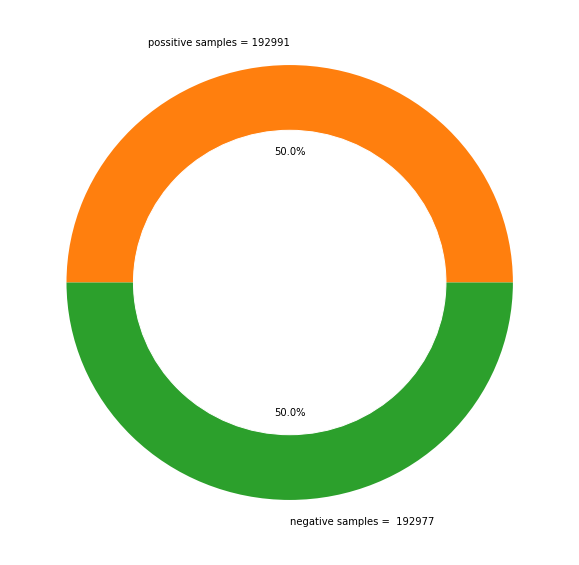

In [72]:
plt.figure(figsize=(10,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=[f"possitive samples = {per_class[0]}",f"negative samples =  {per_class[1]}"  ], colors=['tab:orange','tab:green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig('cycle.png')
plt.show()

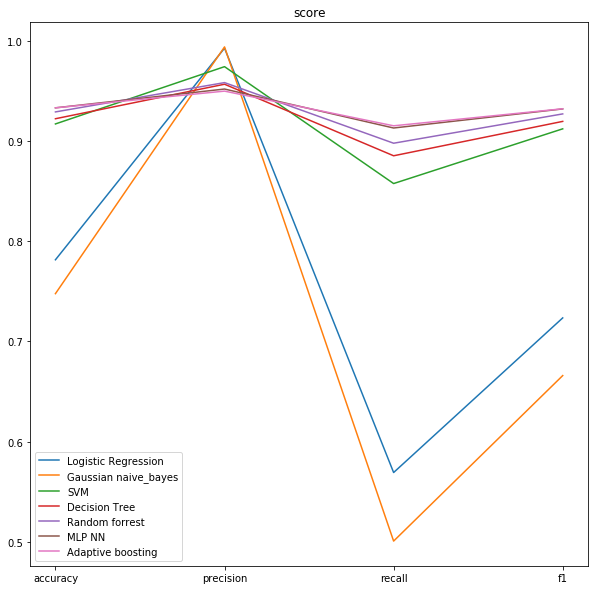

In [101]:

  
# create data
#x = [1,2,3,4]
x = ['accuracy','precision','recall','f1']
plt.figure(figsize=(10,10))
plt.title('score')
# plot lines
for i in range(7):
    plt.plot(x,[accu[i],prec[i],recc[i],f1[i]], label = models[i])
plt.legend()
plt.savefig('curves.png')
plt.show()